### load in data 

#### import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
csv_url = "https://raw.githubusercontent.com/AHennke/OC-Course/main/umsatzdaten_gekuerzt.csv"

In [13]:
df = pd.read_csv(csv_url)
df.tail()

,Datum,Warengruppe,Umsatz
9329,2017-12-21,6,87.471228
9330,2017-12-22,6,71.911652
9331,2017-12-23,6,84.062223
9332,2017-12-24,6,60.981969
9333,2017-12-27,6,34.972644


### Add a column with the weekdays

In [17]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Datum'])

In [18]:
# Assign weekdays to the dates
df['Weekday'] = df['Date'].dt.weekday  # Monday is 0 and Sunday is 6

In [1]:
# Map weekday numbers to weekday names (optional)
weekday_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['Weekday'] = df['Weekday'].map(weekday_names)

NameError: name 'df' is not defined

In [21]:
df.head()

,Datum,Warengruppe,Umsatz,Weekday,Date
0,2013-07-01,1,148.828353,Monday,2013-07-01
1,2013-07-02,1,159.793757,Tuesday,2013-07-02
2,2013-07-03,1,111.885594,Wednesday,2013-07-03
3,2013-07-04,1,168.864941,Thursday,2013-07-04
4,2013-07-05,1,171.280754,Friday,2013-07-05


In [25]:
# Calculate the mean of each weekday
weekday_means = df.groupby('Weekday')['Umsatz'].mean()
weekday_means

Weekday
Friday       196.796023
Monday       193.688449
Saturday     241.319882
Sunday       246.495651
Thursday     193.232274
Tuesday      187.944440
Wednesday    187.477523
Name: Umsatz, dtype: float64

In [27]:
# Sort weekdays by their number
weekday_means = weekday_means.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
weekday_means

Weekday
Monday       193.688449
Tuesday      187.944440
Wednesday    187.477523
Thursday     193.232274
Friday       196.796023
Saturday     241.319882
Sunday       246.495651
Name: Umsatz, dtype: float64

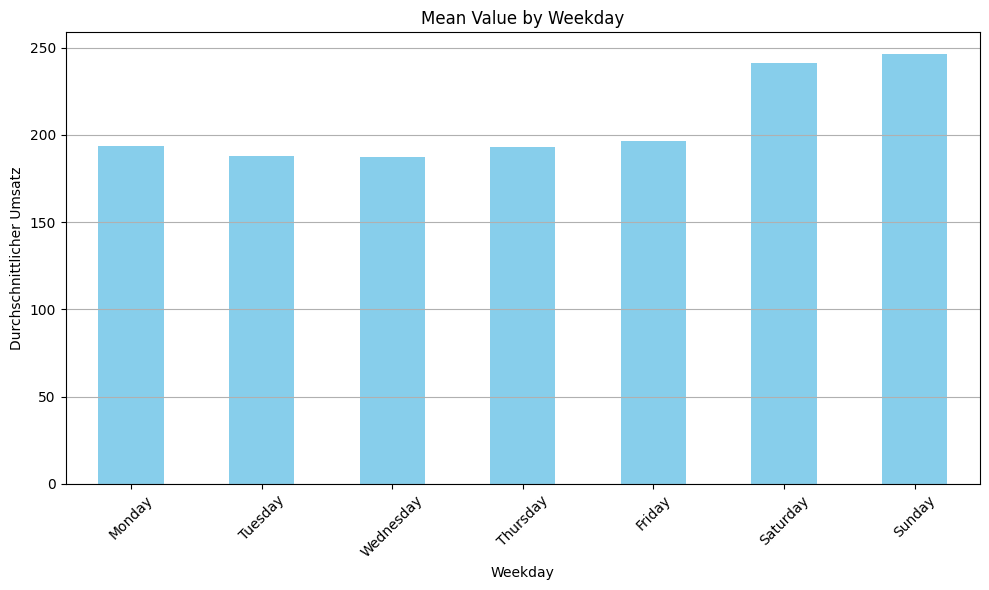

In [28]:
# Plotting the results
plt.figure(figsize=(10, 6))
weekday_means.plot(kind='bar', color='skyblue')
plt.title('Mean Value by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Durchschnittlicher Umsatz')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add horizontal gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### add confidence intervals

In [29]:
# Calculate the mean and standard error of each weekday
weekday_stats = df.groupby('Weekday')['Umsatz'].agg(['mean', 'sem'])

In [30]:
# Sort weekdays by their number
weekday_stats = weekday_stats.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

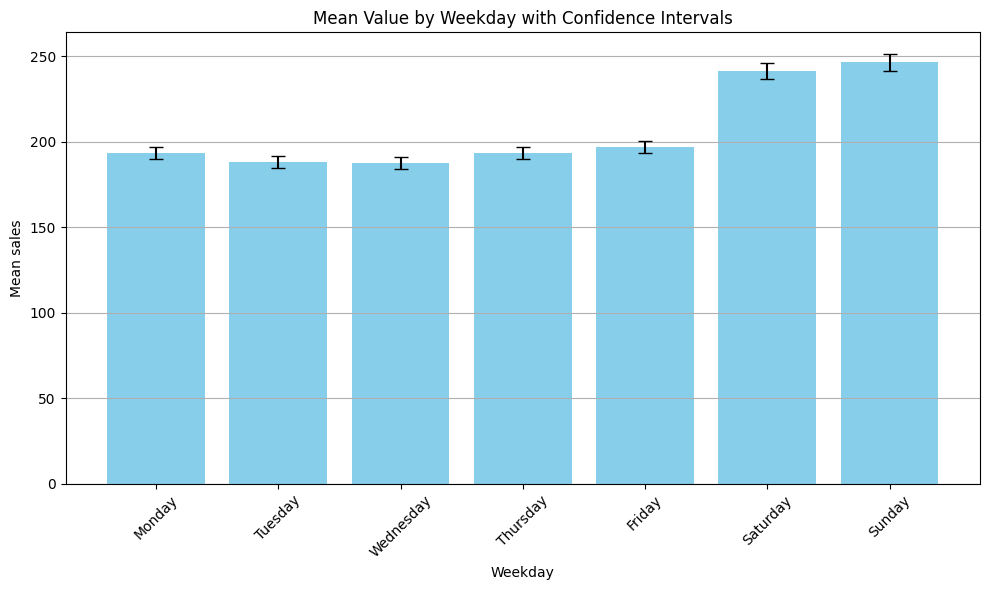

In [31]:

# Plotting the results with error bars
plt.figure(figsize=(10, 6))
plt.bar(weekday_stats.index, weekday_stats['mean'], yerr=weekday_stats['sem'], capsize=5, color='skyblue')
plt.title('Mean Value by Weekday with Confidence Intervals')
plt.xlabel('Weekday')
plt.ylabel('Mean sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add horizontal gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()